In [31]:
import numpy as np
import os
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Initialization of data (preprocessed):

In [101]:
path = 'CSV_features_NEW'
folder = 'C:\\Users\\RJEN0307\\Desktop\\Bachelorprojekt\\Bachelor_project_2024\\'

# Combine them using os.path.join for proper path handling
full_path = os.path.join(folder, path)
#print(os.listdir(full_path))



renamed_markers_list = ['No.', 'Event', 'Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 
renamed_markers_list_complete = ['Delta', 'Delta (normalized)', 'Theta', 'Theta (normalized)', 'Alpha', 'Alpha (normalized)', 'Beta', 'Beta (normalized)', 'Gamma', 'Gamma (normalized)', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov complexity', 'Mean of RR-intervals', 'Std of RR-intervals', 'Mean of HR', 'Std of HR', 'Minimum HR', 'Maximum HR', 'Mean slope of aperiodic curve','Std of slope of aperiodic curve'] 

#m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 



#m_list = ['Unnamed: 0', 'Event', 'PSD Delta', 'PSD Delta_N', 'PSD Theta', 'PSD Theta_N', 'PSD Alpha', 'PSD Alpha_N', 'PSD Beta', 'PSD Beta_N', 'wSMI', 'Kolmogorov', 'Mean RR', 'Std RR', 'Mean HR', 'Std HR', 'Min HR', 'Max HR', 'Freq_Slope mean', 'Freq_Slope std']

patient_numbers = []
r_data = []
m_data = []
f_data = []

all_data = []


for file in os.listdir(full_path):
    filename = os.fsdecode(file)
    patient_number = filename.split('_')[0]  # This will give 'p3' from 'p3_features.csv'
    fname = path + filename
    data = pd.read_csv(fname)
    data.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
    data['Event'] = data['Event'].map({'R': 0, 'M': 1, 'F': 2})
    standarize_list = ['PSD Delta', 'PSD Delta_N', 'PSD Theta', 'PSD Theta_N', 'PSD Alpha', 'PSD Alpha_N', 'PSD Beta', 'PSD Beta_N', 'PSD Gamma', 'PSD Gamma_N', 'PSD SE', 'PSD MSF', 'PSD Sef90', 'PSD Sef95', 'PE', 'wSMI', 'Kolmogorov', 'Mean RR', 'Std RR', 'Mean HR', 'Std HR', 'Min HR', 'Max HR', 'Freq_Slope mean', 'Freq_Slope std']

    sklearn.preprocessing.StandardScaler().set_output(transform='pandas') 
    data[standarize_list] = sklearn.preprocessing.StandardScaler().fit(data[standarize_list]).transform(data[standarize_list])


filename = os.fsdecode(os.listdir(full_path)[0])

print(patient_number)
patient_file_dir = os.path.join(full_path, filename)
data = pd.read_csv(patient_file_dir)
data.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
data['Event'] = data['Event'].map({'R': 0, 'M': 1, 'F': 2})

m_list = data.columns.values.tolist()
print(m_list)
print("Data after one-hot encoding of 'Event':")
#print(data.head())

standarize_list = ['PSD Delta', 'PSD Delta_N', 'PSD Theta', 'PSD Theta_N', 'PSD Alpha', 'PSD Alpha_N', 'PSD Beta', 'PSD Beta_N', 'PSD Gamma', 'PSD Gamma_N', 'PSD SE', 'PSD MSF', 'PSD Sef90', 'PSD Sef95', 'PE', 'wSMI', 'Kolmogorov', 'Mean RR', 'Std RR', 'Mean HR', 'Std HR', 'Min HR', 'Max HR', 'Freq_Slope mean', 'Freq_Slope std']

sklearn.preprocessing.StandardScaler().set_output(transform='pandas') 
data[standarize_list] = sklearn.preprocessing.StandardScaler().fit(data[standarize_list]).transform(data[standarize_list])



p10
['Index', 'Event', 'PSD Delta', 'PSD Delta_N', 'PSD Theta', 'PSD Theta_N', 'PSD Alpha', 'PSD Alpha_N', 'PSD Beta', 'PSD Beta_N', 'PSD Gamma', 'PSD Gamma_N', 'PSD SE', 'PSD MSF', 'PSD Sef90', 'PSD Sef95', 'PE', 'wSMI', 'Kolmogorov', 'Mean RR', 'Std RR', 'Mean HR', 'Std HR', 'Min HR', 'Max HR', 'Freq_Slope mean', 'Freq_Slope std']
Data after one-hot encoding of 'Event':


In [102]:
print(m_list)

['Index', 'Event', 'PSD Delta', 'PSD Delta_N', 'PSD Theta', 'PSD Theta_N', 'PSD Alpha', 'PSD Alpha_N', 'PSD Beta', 'PSD Beta_N', 'PSD Gamma', 'PSD Gamma_N', 'PSD SE', 'PSD MSF', 'PSD Sef90', 'PSD Sef95', 'PE', 'wSMI', 'Kolmogorov', 'Mean RR', 'Std RR', 'Mean HR', 'Std HR', 'Min HR', 'Max HR', 'Freq_Slope mean', 'Freq_Slope std']


*Plot of the PSD*

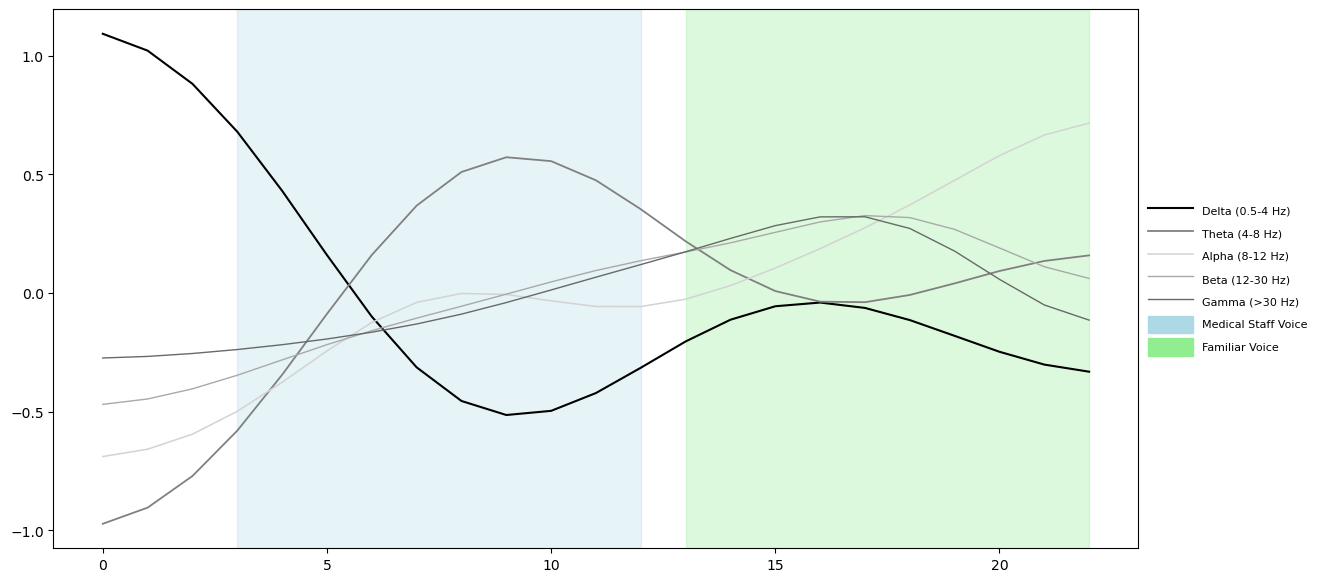

In [143]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from scipy.ndimage import gaussian_filter1d

data = data.reset_index(drop=True)


time = np.arange(len(data))

# Smoothing of curves
sigma = 3
delta_smooth = gaussian_filter1d(data['PSD Delta_N'], sigma=sigma)
theta_smooth = gaussian_filter1d(data['PSD Theta_N'], sigma=sigma)
alpha_smooth = gaussian_filter1d(data['PSD Alpha_N'], sigma=sigma)
beta_smooth = gaussian_filter1d(data['PSD Beta_N'], sigma=sigma)
gamma_smooth = gaussian_filter1d(data['PSD Gamma_N'], sigma=sigma)



plt.figure(figsize=(14, 7)) 

plt.plot(time, delta_smooth, label='Delta (0.5-4 Hz)', color='black', linewidth=1.5)
plt.plot(time, theta_smooth, label='Theta (4-8 Hz)', color='gray', linewidth=1.3)
plt.plot(time, alpha_smooth, label='Alpha (8-12 Hz)', color='lightgray', linewidth=1.1)
plt.plot(time, beta_smooth, label='Beta (12-30 Hz)', color='darkgray', linewidth=1)
plt.plot(time, gamma_smooth, label='Gamma (>30 Hz)', color='dimgray', linewidth=1)

stimuli_colors = {
    1: 'lightblue',    # Medical staff voice
    2: 'lightgreen'    # Familiar voice
}

event_groups = data['Event'].ne(data['Event'].shift()).cumsum()

for _, group_data in data.groupby(event_groups):
    stimulus_value = group_data['Event'].iloc[0]
    if stimulus_value in stimuli_colors:
        start_idx = group_data.index[0]
        end_idx = group_data.index[-1]
        start_time = time[start_idx]
        end_time = time[end_idx]
        plt.axvspan(start_time, end_time, color=stimuli_colors[stimulus_value], alpha=0.3)

stimuli_patches = [
    Patch(color=stimuli_colors[1], label='Medical Staff Voice'),
    Patch(color=stimuli_colors[2], label='Familiar Voice')
]

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles + stimuli_patches, 
           labels + [patch.get_label() for patch in stimuli_patches],
           loc='center left',
           bbox_to_anchor=(1, 0.5),  
           frameon=False,
           handlelength=4, 
           handleheight=2,
           fontsize=8)    

plt.title('')     
plt.xlabel('')      
plt.ylabel('')      

plt.show()


Multiple people plots of PSD

In [144]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from scipy.ndimage import gaussian_filter1d

# Function to plot EEG data for one person
def plot_eeg_data(data, patient_number, sigma=5, color_dict=None):
    # Create the time array
    time = np.arange(len(data))  # Time represented by the number of rows
    
    # Apply Gaussian smoothing to each EEG frequency band
    delta_smooth = gaussian_filter1d(data['PSD Delta_N'], sigma=sigma)
    theta_smooth = gaussian_filter1d(data['PSD Theta_N'], sigma=sigma)
    alpha_smooth = gaussian_filter1d(data['PSD Alpha_N'], sigma=sigma)
    beta_smooth = gaussian_filter1d(data['PSD Beta_N'], sigma=sigma)
    gamma_smooth = gaussian_filter1d(data['PSD Gamma_N'], sigma=sigma)
    
    # Use a color dictionary or default grayscale colors for each patient
    if color_dict is None:
        color_dict = {
            'Delta': 'black',
            'Theta': 'gray',
            'Alpha': 'lightgray',
            'Beta': 'darkgray',
            'Gamma': 'dimgray'
        }

    # Plot the smoothed EEG bands for this person
    plt.plot(time, delta_smooth, label=f'Delta (0.5-4 Hz) - Person {patient_number}', color=color_dict['Delta'], linewidth=2)
    plt.plot(time, theta_smooth, label=f'Theta (4-8 Hz) - Person {patient_number}', color=color_dict['Theta'], linewidth=2)
    plt.plot(time, alpha_smooth, label=f'Alpha (8-12 Hz) - Person {patient_number}', color=color_dict['Alpha'], linewidth=2)
    plt.plot(time, beta_smooth, label=f'Beta (12-30 Hz) - Person {patient_number}', color=color_dict['Beta'], linewidth=2)
    plt.plot(time, gamma_smooth, label=f'Gamma (>30 Hz) - Person {patient_number}', color=color_dict['Gamma'], linewidth=2)
    
    # Define colors for stimuli
    stimuli_colors = {
        1: 'lightblue',    # Medical staff voice
        2: 'lightgreen'    # Familiar voice
    }
    
    # Identify continuous segments where the Event value remains the same
    event_groups = data['Event'].ne(data['Event'].shift()).cumsum()
    
    # Loop over each group to shade the regions where stimuli are applied
    for _, group_data in data.groupby(event_groups):
        stimulus_value = group_data['Event'].iloc[0]
        if stimulus_value in stimuli_colors:
            start_idx = group_data.index[0]
            end_idx = group_data.index[-1]
            # Use corresponding time values
            start_time = time[start_idx]
            end_time = time[end_idx]
            plt.axvspan(start_time, end_time, color=stimuli_colors[stimulus_value], alpha=0.3)


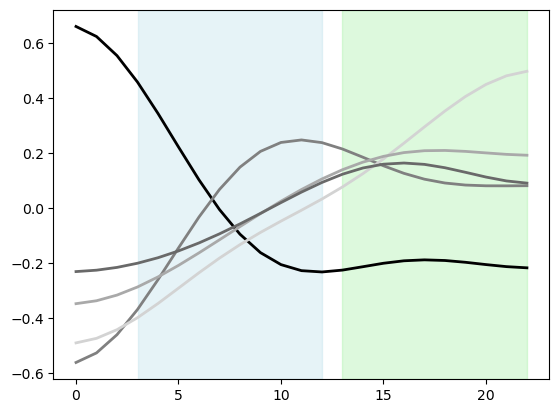

In [151]:
plot_eeg_data(data, patient_number=53, sigma=5, color_dict=None)

In [ ]:
# Example usage with a for loop to plot multiple people
def plot_multiple_people(data_list, sigma=5):
    plt.figure(figsize=(10, 6))  # Set up the figure size
    
    # Loop through each person's data in the data_list
    for i, data in enumerate(data_list):
        # You can customize the color for each person or use a default set
        color_dict = {
            'Delta': f'C{i*5}',  # C0, C5, etc., for different line colors
            'Theta': f'C{i*5+1}',
            'Alpha': f'C{i*5+2}',
            'Beta': f'C{i*5+3}',
            'Gamma': f'C{i*5+4}'
        }
        # Call the plot function for each person
        plot_eeg_data(data, patient_number=i + 1, sigma=sigma, color_dict=color_dict)

    # Customize the plot aesthetics
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=8, handlelength=4, handleheight=2)
    plt.title('EEG Frequency Bands for Multiple People')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.xlim([0, 600])  # Adjust as needed based on your data
    plt.ylim([-5, 5])   # Adjust as needed based on your data
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Display the plot
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()